точность классификации =  0.852
 оценка качества классификации -строим матрицу неточностей
[[71 10  3]
 [ 9 68  6]
 [ 5  4 74]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


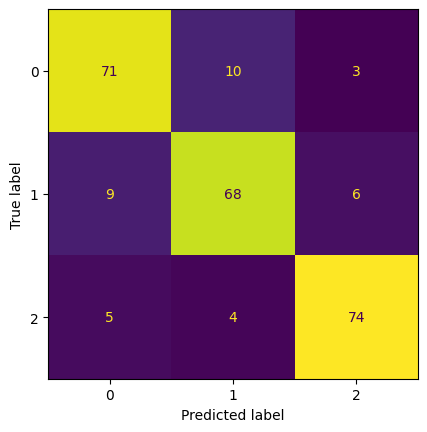

In [112]:
# Программа классификации числовых данных
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

# генерация синтетических данных для классификации. Пусть:
# n_samples=1000  - количество примеров
# n_classes=3  - кол. классов
# n_features=7 - кол. признаков
# n_informative = 3 - кол. информативных признаков
# При создании синтетики должно быть:n_classes * n_clusters_per_class(2) <= 2^n_informative(2)
# в скобках - значения о умолчанию
X, y = make_classification(n_samples=1000,n_classes=3,n_features=7,n_informative = 3, random_state=1)

# Разбиваем на обучающую и тестирующуювыборки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
# Создаем и обучаем классификатор на основе персептрона (MLP)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print('точность классификации = ',clf.score(X_test, y_test))

y_pred=clf.predict_proba(X_test) # результат выдается как One-Hot Encoding
# т.е. не метка класса,а вектор из 0 и 1, причем номер 1 соответствует номеру класса
# преобразуем обратно в метки классов

q=np.argmax(y_pred, axis=1) # ищем индексы максимальных элементов в каждой строке

print(' оценка качества классификации -строим матрицу неточностей')
print(confusion_matrix(y_test, q))
ConfusionMatrixDisplay.from_predictions(y_test,q,colorbar=False);


In [115]:
# для бинарной классификации можно менять порогопринятия решения (по умолчанию он 0.5)
# https://scikit-learn.org/1.5/auto_examples/release_highlights/plot_release_highlights_1_5_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-1-5-0-py
from sklearn.model_selection import FixedThresholdClassifier
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
classifier_01 = FixedThresholdClassifier(clf, threshold=0.1)
classifier_01.fit(X_train, y_train)
_ = ConfusionMatrixDisplay.from_estimator(classifier_01, X_test, y_test)